In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# Importing libraries

import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import os
from selenium import webdriver as driver
from selenium.webdriver.chrome.options import Options 
import win32com.client as win32
import plotly.express as px
from IPython.core.display import display, HTML
import os
os.getcwd()
os.chdir('C:\\Users\\eatthim\\Downloads\\recommendation')

In [3]:
database = "FE_NBN-AU"
establish_connection='Driver={SQL Server};' 'Server=172.29.31.23,63678;' 'Database=FE_NBN-AU;' 'Trusted_Connection=yes;'


##mailing file mapping
df = pd.read_csv('C:/User/eatthim/Downloads/recommendation/India DS.csv')
customer_name = df[df['Cognos Customer folder name'] == database]['Customer'].unique()
mail_to_ds=list(df[df['Cognos Customer folder name'] == database]['Email id'].unique())

#link_to_alarm=df[df['Cognos Customer folder name'] == database]['Cognos Link'].astype('category')


# Function to have headings

def heading():
    Year=date.today().year
    weekNumber = date.today().isocalendar()[1]
    print((customer_name[0] + ': Analysis for ' + str(Year) + '- WK' + str(weekNumber-1)).center(125), "\n")
#     print('Analysis Summary:')

    # Function to fetch top 5 Alarms

# Function to fetch top 5 Alarms

def fetch_top_alarms():
    try:
        conn = pyodbc.connect(establish_connection)

        #cursor = conn.cursor()
        #cursor.execute('SELECT top 10 * FROM dbo.Alarm_Trend_Test')
        SQL_Query = "Select X733SPECIFICPROB, sum(Record_Count) as Alarms from dbo.Standard_derivation_Test where (cast(FirstOccurrenceDate as date) >= cast(DATEADD(day,-6,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast(FirstOccurrenceDate as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by X733SPECIFICPROB order by Alarms Desc"
        #SQL_Query_Tellabs_highest_temp_site = 'Select [NE NAME] , TLDevTemp as Tellabs_Temp from dbo.DM_MWTLheatdata where TLDevTemp IN (Select max(TLDEVTEMP) as max_temp from dbo.DM_MWTLheatdata  where Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)) and Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)'

        #for row in cursor:
        #    print(row)

        df = pd.read_sql(SQL_Query,conn)
        #print (df)
        conn.close()

        #Top 5 alarms per Domain
        df["Percnt_contri"]=round((df.Alarms/df.Alarms.sum())*100)
        df["cum_sum"] = df.Alarms.cumsum()
        df["cum_per"] = 100*df.cum_sum/df.Alarms.sum()


        top_alarms = df[:5]


        return top_alarms
    except:
        print('Alarm Data Not Present')


#Summary of top 5 alarms


def top_5_alarm_summary():
    try:
        dd=topalarms.copy()
        print('Alarm Analysis:')
    #     print('Top 5 Alarms')
    #     for i in range(5):
    #         print(str(i+1)+" "+str(topalarms.X733SPECIFICPROB[i])+" ["+str(topalarms.Percnt_contri[i])+'%]')
        #print('\nTop 5 Alarms contribute to '+str(round(topalarms['cum_per'].max()))+'% of the total alarm population')

    except:
        print('')
        
              
              
#def top_5_alarm_summary_2():
    #for i in range(5):
        #return(str(i+1)+" "+str(topalarms.X733SPECIFICPROB[i])+" ["+str(topalarms.Percnt_contri[i])+'%]')
       
#Top 5 alarms Charts

def top_5_alarms_chart():
    try:
        dd=topalarms.copy()
        print('Top 5 Alarms Alarm Count')


        plt.figure(figsize=(16, 6))
        splot = sns.barplot(x="X733SPECIFICPROB", y="Alarms", data=topalarms,label = 'small');
        splot.tick_params(labelsize=7.5)
        plt.title('Top Alarms')
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.2f'),
                           (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center',
                           va = 'center', xytext = (0, 10),
                           textcoords = 'offset points');
    except:
        print('')
        
            



# Top NODEs alarm wise

def fetch_alarm_wise_top_NODEs(alarms):
    try:

        conn = pyodbc.connect(establish_connection)

        data_for_all_alarms=pd.DataFrame()

        for alarm in alarms:

            #cursor = conn.cursor()
            #cursor.execute('SELECT top 10 * FROM dbo.Alarm_Trend_Test')
            SQL_Query_lastweekdata = "Select NODE, sum(Record_Count) as Alarms from dbo.Standard_derivation_Test where (X733SPECIFICPROB = '" + alarm + "') and (cast(FirstOccurrenceDate as date) >= cast(DATEADD(day,-6,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast(FirstOccurrenceDate as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by NODE order by Alarms Desc"
            #SQL_Query_Tellabs_highest_temp_site = 'Select [NE NAME] , TLDevTemp as Tellabs_Temp from dbo.DM_MWTLheatdata where TLDevTemp IN (Select max(TLDEVTEMP) as max_temp from dbo.DM_MWTLheatdata  where Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)) and Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)'

            #for row in cursor:
            #    print(row)

            df = pd.read_sql(SQL_Query_lastweekdata,conn)
            #print (df)
            #conn.close()

            #Top 5 NODEs with greatest alarms
            global top_alarms_with_NODEs
            top_alarms_with_NODEs= df[:5]
            top_alarms_with_NODEs['Alarm']=alarm


            data_for_all_alarms=pd.concat([data_for_all_alarms,top_alarms_with_NODEs])


    #consolidation     
        data_for_all_alarms=data_for_all_alarms[['Alarm','NODE','Alarms']]




        return data_for_all_alarms
    except:
        print('')
        
        


# Function to summarise top NODEs alarm wise
# Function to summarise top NODEs alarm wise

# Function to summarise top NODEs alarm wise

def top_NODEs_alarm_wise_summary():
    try:
        dd=topalarms.copy()
              
        print('Below are the top alarms appeared in last week')

        alarm_list=list(output_alarm_wise_NODEs.Alarm.unique())
        for i in alarm_list :
            print(str(alarm_list.index(i)+1) +'. Alarm-'+i)
            print('\tTop contributing NODEs:'.ljust(40))
            df=output_alarm_wise_NODEs[output_alarm_wise_NODEs['Alarm']==i]


            for j in list(df.NODE.unique()):
                print(('\t'+j+'['+str(int(df[df.NODE==j]['Alarms'].values))+']').ljust(40))

    except:
        print('')
        
# Function to plot top NODEs alarm wise

def top_NODEs_alarm_wise_chart():
    try:
        dd=topalarms.copy()
        print('Alarm Count of Top NODEs falling in Top 5 Alarms')
        plt.figure(figsize=(15, 7))
        splot = sns.barplot(x="Alarm", y="Alarms", hue="NODE", data=output_alarm_wise_NODEs,);
        splot.tick_params(labelsize=7.5)
    except:
        print('')
        


# fUNCTION TO FIND TOP NODES

def fetch_high_alarm_NODEs():
    try:
        conn = pyodbc.connect(establish_connection)

        #cursor = conn.cursor()
        #cursor.execute('SELECT top 10 * FROM dbo.Alarm_Trend_Test')
        SQL_Query_lastweekdata = "Select NODE, sum(Record_Count) as Alarms from dbo.Standard_derivation_Test where (cast(FirstOccurrenceDate as date) >= cast(DATEADD(day,-6,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast(FirstOccurrenceDate as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by NODE order by Alarms Desc"
        #SQL_Query_Tellabs_highest_temp_site = 'Select [NE NAME] , TLDevTemp as Tellabs_Temp from dbo.DM_MWTLheatdata where TLDevTemp IN (Select max(TLDEVTEMP) as max_temp from dbo.DM_MWTLheatdata  where Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)) and Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)'

        #for row in cursor:
        #    print(row)

        df = pd.read_sql(SQL_Query_lastweekdata,conn)
        #print (df)
        conn.close()
        df["Percnt_contri"]=round((df.Alarms/df.Alarms.sum())*100)
        df["cum_sum"] = df.Alarms.cumsum()
        df["cum_per"] = 100*df.cum_sum/df.Alarms.sum()

        #Top 5 NODEs with greatest alarms
        global top_NODEs_with_alarms
        df
        top_NODEs_with_alarms = df[:5]

        return top_NODEs_with_alarms
              
    except:
        print('')
        

# Function to print top NODEs

def top_5_NODEs_summary():
    try:
        dd=topalarms.copy()
              
        #print('NODE Analysis:')
    #     print('Top 5 NODEs')
    #     for i in range(5):
    #         print(i+1,NODEs.NODE[i])
        return('Top 5 NODEs contribute to '+str(round(NODEs['cum_per'].max()))+'% of the total alarm population')
              
    except:
        print('')
        

# Top alarms NODE wise function

def fetch_NODE_wise_top_alarms(NODEs):
    try:

        conn = pyodbc.connect(establish_connection)

        data_for_all_NODEs=pd.DataFrame()

        for NODE in NODEs:

            #cursor = conn.cursor()
            #cursor.execute('SELECT top 10 * FROM dbo.Alarm_Trend_Test')
            SQL_Query_lastweekdata = "Select X733SPECIFICPROB, sum(Record_Count) as Alarms from dbo.Standard_derivation_Test where (NODE = '" + NODE + "') and (cast(FirstOccurrenceDate as date) >= cast(DATEADD(day,-6,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast(FirstOccurrenceDate as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by X733SPECIFICPROB order by Alarms Desc"
            #SQL_Query_Tellabs_highest_temp_site = 'Select [NE NAME] , TLDevTemp as Tellabs_Temp from dbo.DM_MWTLheatdata where TLDevTemp IN (Select max(TLDEVTEMP) as max_temp from dbo.DM_MWTLheatdata  where Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)) and Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)'

            #for row in cursor:
            #    print(row)

            df = pd.read_sql(SQL_Query_lastweekdata,conn)
            #print (df)
            #conn.close()

            #Top 5 NODEs with greatest alarms
            global top_NODEs_with_alarms
            top_NODEs_with_alarms = df[:5]
            top_NODEs_with_alarms['NODE']=NODE


    #         t_text = '["' + top_NODEs_with_alarms['X733SPECIFICPROB'].astype(str) + '" :- ' + top_NODEs_with_alarms['Alarms'].astype(str) + ']'
    #         t_text = ', '.join(t_text.values)

            data_for_all_NODEs=pd.concat([data_for_all_NODEs,top_NODEs_with_alarms])



        data_for_all_NODEs=data_for_all_NODEs[['NODE','X733SPECIFICPROB','Alarms']]


    #     Summary = '''Alarms Summary :-
    #     Top 5 Alarms on the ''' + NODE + ''' :-''' + t_text

        return data_for_all_NODEs
              
    except:
        print('')
        


# Function to chart top NODEs contributing to alarms
# Top 5 alarms Charts
def top_NODEs_chart():
    try:
        dd=topalarms.copy()
        print('Alarm Count for Top NODEs')
        plt.figure(figsize=(16, 6))
        splot = sns.barplot(x="NODE", y="Alarms", data=NODEs, label='small');
        splot.tick_params(labelsize=10)
        plt.title('Top NODEs')


        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.2f'),
                           (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center',
                           va = 'center', xytext = (0, 10),
                           textcoords = 'offset points') 
              
              
    except:
        print('')
        

# Top alarms NODE wise summaryu


def top_alarms_NODE_wise_summary():
    try:
        dd=topalarms.copy()
        print('Below are the top NODEs appeared in last week')

        NODE_list=list(output1.NODE.unique())
        for i in NODE_list :
            print(str(NODE_list.index(i)+1) +'. NODE-'+i)
            print('\tTop contributing Alarms:'.ljust(40))
            df=output1[output1['NODE']==i]

            for j in list(df.X733SPECIFICPROB.unique()):
                print(('\t' + j+'[' +str(int(df[df.X733SPECIFICPROB==j]['Alarms'].values)) + ']').ljust(40)) 
              
    except:
        print('')
        

            
def alarms_NODE_wise_chart():
    try:
        dd=topalarms.copy()
        print('Alarm Count of Top Alarms falling in Top 5 NODEs')
        plt.figure(figsize=(20,10))
        splot = sns.barplot(x="NODE", y="Alarms", hue="X733SPECIFICPROB", data=output1); 
        splot.legend(loc='upper right')
              
    except:
        print('')
        
    
# Function to fetch top 5 Alarms

def alarms_week_wise():
    try:
        conn = pyodbc.connect(establish_connection)

        #cursor = conn.cursor()
        #cursor.execute('SELECT top 10 * FROM dbo.Alarm_Trend_Test')
        SQL_Query = "Select Firstoccurenceweek, sum(Record_Count) as Alarms from dbo.Standard_derivation_Test where (cast(FirstOccurrenceDate as date) >= cast(DATEADD(day,-44,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast(FirstOccurrenceDate as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by Firstoccurenceweek order by Firstoccurenceweek"
        #SQL_Query_Tellabs_highest_temp_site = 'Select [NE NAME] , TLDevTemp as Tellabs_Temp from dbo.DM_MWTLheatdata where TLDevTemp IN (Select max(TLDEVTEMP) as max_temp from dbo.DM_MWTLheatdata  where Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)) and Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)'

        #for row in cursor:
        #    print(row)

        df = pd.read_sql(SQL_Query,conn)
        #print (df)
        conn.close()


        return df
              
    except:
        print('')
        

# Function to fetch top 5 Alarms

def alarms_domain_week_wise():
              
    try:
        conn = pyodbc.connect(establish_connection)

        #cursor = conn.cursor()
        #cursor.execute('SELECT top 10 * FROM dbo.Alarm_Trend_Test')
        SQL_Query = "Select Firstoccurenceweek,Domain, sum(Record_Count) as Alarms from dbo.Standard_derivation_Test where (cast(FirstOccurrenceDate as date) >= cast(DATEADD(day,-44,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast(FirstOccurrenceDate as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by Firstoccurenceweek, Domain order by Firstoccurenceweek"
        #SQL_Query_Tellabs_highest_temp_site = 'Select [NE NAME] , TLDevTemp as Tellabs_Temp from dbo.DM_MWTLheatdata where TLDevTemp IN (Select max(TLDEVTEMP) as max_temp from dbo.DM_MWTLheatdata  where Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)) and Week IN (Select TOP 1 Week from dbo.DM_MWTLheatdata order by Date)'

        #for row in cursor:
        #    print(row)

        df = pd.read_sql(SQL_Query,conn)
        #print (df)
        conn.close()


        return df

    except:
        print('')
        

def TT_created_week_wise():
    try:
              
        conn = pyodbc.connect(establish_connection)
        SQL_Query = "Select [Creation Week], sum([TT Count]) as Tickets from [dbo].[Standard Derivation TT Agg] where (cast([Creation Date] as date) >= cast(DATEADD(day,-44,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast([Creation Date] as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by [Creation Week] order by [Creation Week]" 

        df = pd.read_sql(SQL_Query,conn)
        #print (df)
        conn.close()


        return df
              
              
    except:
              
        print('')
        


## TT trend cast(Closing Date as date)

def TT_closed_week_wise():
              
    try:
        conn = pyodbc.connect(establish_connection)
        SQL_Query = "Select [Closing Week], sum([TT Count]) as Tickets from [dbo].[Standard Derivation TT Agg] where (cast([Closing Date] as date) >= cast(DATEADD(day,-44,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast([Closing Date] as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by [Closing Week] order by [Closing Week]" 

        df = pd.read_sql(SQL_Query,conn)
        #print (df)
        conn.close()


        return df
    
    except:
        print('')

        

## Top 5 sites TT fetch
def fetch_top_sites_TT():
              
    try:
        conn = pyodbc.connect(establish_connection)


        SQL_Query = "Select [Site ID], sum([TT Count]) as Tickets from [dbo].[Standard Derivation TT Agg] where (cast([Creation Date] as date) >= cast(DATEADD(day,-6,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast([Creation Date] as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by [Site ID] order by Tickets Desc" 


        df = pd.read_sql(SQL_Query,conn)
        #print (df)
        conn.close()

        #Top 5 alarms per Domain
        df["Percnt_contri"]=round((df.Tickets/df.Tickets.sum())*100)
        df["cum_sum"] = df.Tickets.cumsum()
        df["cum_per"] = 100*df.cum_sum/df.Tickets.sum()


        top_sites_tt = df[:5]


        return top_sites_tt
    except:
        print('')
              

        
              


def fetch_top_sites_TT1():
    try:
        conn = pyodbc.connect(establish_connection)


        SQL_Query = "Select [Site ID], sum([TT Count]) as Tickets from [dbo].[Standard Derivation TT Agg] where (cast([Closing Date] as date) >= cast(DATEADD(day,-6,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast([Closing Date] as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by [Site ID] order by Tickets Desc" 


        df = pd.read_sql(SQL_Query,conn)
        #print (df)
        conn.close()

        #Top 5 alarms per Domain
        df["Percnt_contri"]=round((df.Tickets/df.Tickets.sum())*100)
        df["cum_sum"] = df.Tickets.cumsum()
        df["cum_per"] = 100*df.cum_sum/df.Tickets.sum()


        top_sites_tt1 = df[:5]


        return top_sites_tt1
    except:
        print('')

        
              
              


## Top 5 sites TT summary

def top_5_site_tt_summary():
    try:
        dd = top_5_sites_TT_created.copy()
        print('TT Analysis:')
    #     print('Top 5 Alarms')
    #     for i in range(5):
    #         print(str(i+1)+" "+str(topalarms.X733SPECIFICPROB[i])+" ["+str(topalarms.Percnt_contri[i])+'%]')
        #print('\nTop 5 Sites contribute to '+str(round(top_5_sites_TT['cum_per'].max()))+'% of the total TT created')


    # Top 5 site wise TT Charts
              
    except:
        print('')
        

def top_5_sites_TT_chart():
    try:
        dd = top_5_sites_TT_created.copy()
        print('Top 5 Sites TT Created Count')


        plt.figure(figsize=(16, 6))
        splot = sns.barplot(x="Site ID", y="Tickets", data=top_5_sites_TT_created,label = 'small');
        splot.tick_params(labelsize=7.5)
        plt.title('Top Sites')
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.2f'),
                           (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center',
                           va = 'center', xytext = (0, 10),
                           textcoords = 'offset points');
        
    except:
        print('')
        
              
              
def top_5_sites_TT_chart1():
              
    try:
        dd = top_5_sites_TT_closed.copy()
        print('Top 5 Sites TT Closed Count')


        plt.figure(figsize=(16, 6))
        splot = sns.barplot(x="Site ID", y="Tickets", data=top_5_sites_TT_closed,label = 'small');
        splot.tick_params(labelsize=7.5)
        plt.title('Top Sites')
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.2f'),
                           (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center',
                           va = 'center', xytext = (0, 10),
                           textcoords = 'offset points');
    except:
        print('')
              
        
              
              
##Priority wise tt fetch        
        
def fetch_priority_wise_TT():
              
    try:
        conn = pyodbc.connect(establish_connection)


        SQL_Query = "Select [Priority], sum([TT Count]) as Tickets from [dbo].[Standard Derivation TT Agg] where (cast([Creation Date] as date) >= cast(DATEADD(day,-6,DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE())) as date)) and (cast([Creation Date] as date) <= cast(DATEADD(day,-(((DATEPART(dw,getdate()+1)+5) % 7 )),GETDATE()) as date)) group by [Priority] order by Tickets Desc" 


        df = pd.read_sql(SQL_Query,conn)
        #print (df)
        conn.close()

        #Top 5 alarms per Domain
        df["Percnt_contri"]=round((df.Tickets/df.Tickets.sum())*100)
        df["cum_sum"] = df.Tickets.cumsum()
        df["cum_per"] = 100*df.cum_sum/df.Tickets.sum()


        priority_wise_tt = df.copy()


        return priority_wise_tt

    except:
        print('')
        
def priority_wise_TT_summary():
    try:
        dd = priority_wise_TT.copy()    
              
        print('Priority wise TT Distribution')

        for i in range(len(priority_wise_TT['Priority'])):
            print("\t" + str(i+1)+". "+str(priority_wise_TT.Priority[i])+" ["+str(priority_wise_TT.Percnt_contri[i])+'%]')

    except:
        print('')

FileNotFoundError: [Errno 2] File b'C:/User/eatthim/Downloads/recommendation/India DS.csv' does not exist: b'C:/User/eatthim/Downloads/recommendation/India DS.csv'

In [20]:
# Required data making first

#To get top alarms
topalarms=fetch_top_alarms()

# Top NODEs alarm wise
output_alarm_wise_NODEs=fetch_alarm_wise_top_NODEs(list(topalarms.X733SPECIFICPROB.unique()))

#Top 5 NODEs
NODEs=fetch_high_alarm_NODEs()

# Top alarms NODE wise
output1 = fetch_NODE_wise_top_alarms(list(NODEs.NODE.unique()))

# Alarm trend week wise
alarms_week_data=alarms_week_wise()

#Alarm trend domain wise
alarm_domain_week_data=alarms_domain_week_wise()

# TT Trend created
TT_created_week_wise_data=TT_created_week_wise()

# TT Trend closed
TT_closed_week_wise_data=TT_closed_week_wise()

#Top 5 sites TT created
top_5_sites_TT_created=fetch_top_sites_TT()

top_5_sites_TT_closed=fetch_top_sites_TT1()

#Priority Wise TT Created
priority_wise_TT=fetch_priority_wise_TT()


In [5]:
#To print heading
heading()

                                            NBN_Australia: Analysis for 2020- WK10                                            



In [6]:
try:
    link_to_alarm_data=df[df['Cognos Customer folder name'] == database]
    link_to_alarm_list=list(link_to_alarm_data['Cognos Link'].unique())
    link_to_alarm_list_link=link_to_alarm_list[0]
    display(HTML("<a href="+link_to_alarm_list_link+">Click here for Alarm Cognos Dashboard View</a>")) 
except:
    print("Alarm data not available")

In [7]:
try:
    link_to_tt_data=df[df['Cognos Customer folder name'] == database]
    link_to_tt_list=list(link_to_tt_data['Cognos Link 1'].unique())
    link_to_tt_list_link=link_to_tt_list[0]
    display(HTML("<a href="+link_to_tt_list_link+">Click here for TT Cognos Dashboard View</a>")) 
except:
    print("TT data not available")

In [8]:
#Top 5 alarm summary
top_5_alarm_summary()

Alarm Analysis:


Top 5 Alarms Alarm Count


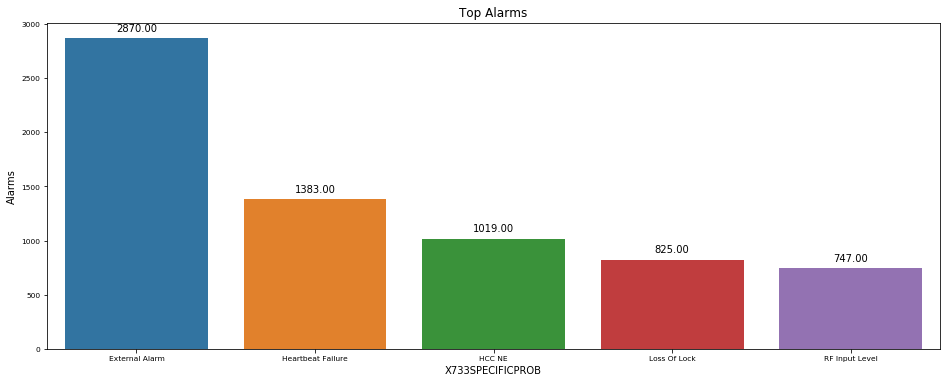

In [9]:
#Top 5 alarm chart
top_5_alarms_chart()

In [10]:
#Top nodes alarm wise summary
top_NODEs_alarm_wise_summary()

Below are the top alarms appeared in last week
1. Alarm-External Alarm
	Top contributing NODEs:                
	WReNB400531PD[542]                     
	WReNB200671PD[184]                     
	WReNB406501PD[182]                     
	WReNB406571PD[130]                     
	WReNB203341PD[129]                     
2. Alarm-Heartbeat Failure
	Top contributing NODEs:                
	WRSSC600851PD[69]                      
	WReNB305874PD[65]                      
	WReNB701371PD[39]                      
	WReNB202791PD[36]                      
	WReNB301561PD[32]                      
3. Alarm-HCC NE
	Top contributing NODEs:                
	WRWMU400141PD[73]                      
	WRWMU202551PD[70]                      
	WRWMU204152PD[62]                      
	WRWMU200451PD[57]                      
	WRWMU401761PD[44]                      
4. Alarm-Loss Of Lock
	Top contributing NODEs:                
	WRWMU202941PD[238]                     
	WRWMU502081PD[105]                     
	WR

In [11]:
#Top nodes alarm wise chart
#top_nodes_alarm_wise_chart()

In [12]:
#Top 5 Nodes summary
#top_5_nodes_summary()

Alarm Count for Top NODEs


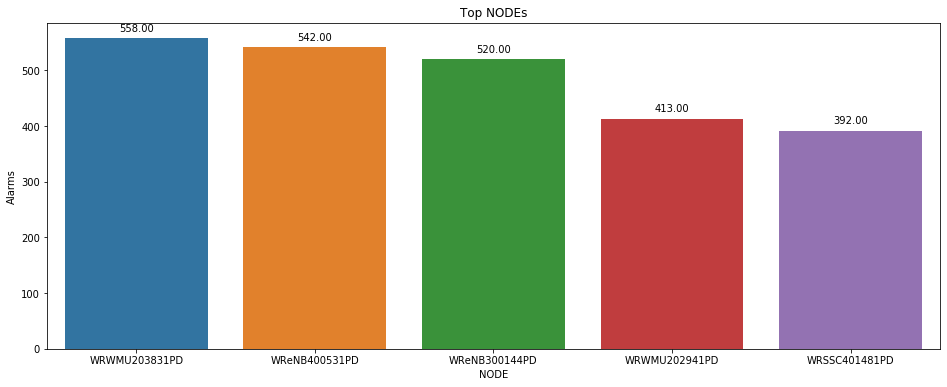

In [11]:
#Top 5 nodes chart
top_NODEs_chart()

In [12]:
# Top alarms node wise summary
top_alarms_NODE_wise_summary()

Below are the top NODEs appeared in last week
1. NODE-WRWMU203831PD
	Top contributing Alarms:               
	Custom[554]                            
	ES 15 min threshold crossing[4]        
2. NODE-WReNB400531PD
	Top contributing Alarms:               
	External Alarm[542]                    
3. NODE-WReNB300144PD
	Top contributing Alarms:               
	Link Failure[132]                      
	NE and OSS alarms are not in sync[122] 
	SFP Stability Problem[84]              
	Enclosure Product Data Mismatch[43]    
	General SW Error[43]                   
4. NODE-WRWMU202941PD
	Top contributing Alarms:               
	Loss Of Lock[238]                      
	RF Input Level[154]                    
	BBE 15 min threshold crossing[9]       
	BBE 24 h threshold crossing[4]         
	ES 24 h threshold crossing[4]          
5. NODE-WRSSC401481PD
	Top contributing Alarms:               
	One rectifier failure[242]             
	More rectifier failure[150]            


In [13]:
%%capture
try:

    week_list=sorted(list(alarm_domain_week_data.Firstoccurenceweek.unique()))
    week_4=week_list[-6:]
    alarm_domain_week_data_filter=alarm_domain_week_data[alarm_domain_week_data['Firstoccurenceweek'].isin(week_4)]
    plt.figure(figsize=(10, 6))
    splot=sns.lineplot(x='Firstoccurenceweek', y='Alarms', hue='Domain', data=alarm_domain_week_data_filter)
    plt.title('Domain Wise Weekly Trend')
    plt.savefig("C:\\Users\\ejariah\\Downloads\\recommendation\\alarm_domain_trend.jpg")
    plt.legend(loc = 1)
except:
    print("")

In [14]:
%%capture
try:
    
    plt.figure(figsize=(10, 6));
    splot = sns.lineplot(x="Creation Week", y="Tickets", data=TT_created_week_wise_data.iloc[-6:])
    plt.title('Created TT Weekly Trend')
    plt.savefig("C:\\Users\\ejariah\\Downloads\\recommendation\\TT_Created_trend.jpg")


    plt.figure(figsize=(10, 6));
    splot=sns.lineplot(x='Closing Week', y='Tickets',data=TT_closed_week_wise_data.iloc[-6:])
    plt.title('Closed TT Weekly Trend')

    plt.savefig("C:\\Users\\ejariah\\Downloads\\recommendation\\TT_Closed_trend.jpg")
except:
    print("")


In [15]:
top_5_site_tt_summary()

try:
    link_to_tt_data=df[df['Cognos Customer folder name'] == database]
    link_to_tt_list=list(link_to_tt_data['Cognos Link 1'].unique())
    link_to_tt_list_link=link_to_tt_list[0]
    display(HTML("<a href="+link_to_tt_list_link+">Click here for TT Cognos Dashboard View</a>")) 
except:
    print("")

TT Analysis:


Top 5 Sites TT Created Count


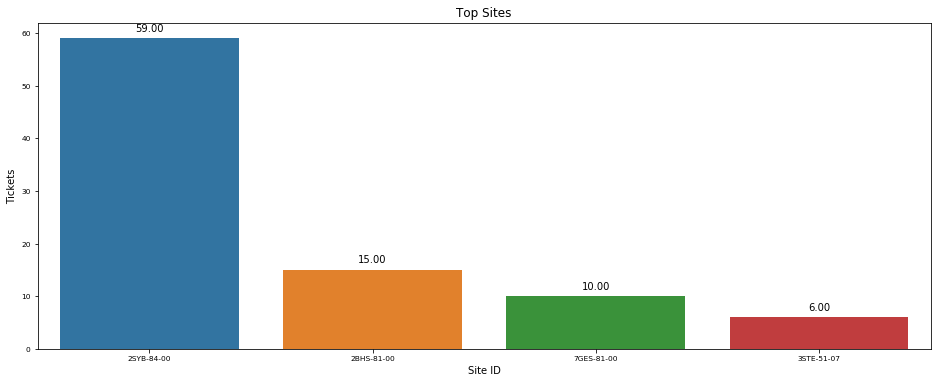

In [16]:
top_5_sites_TT_chart()

Top 5 Sites TT Closed Count


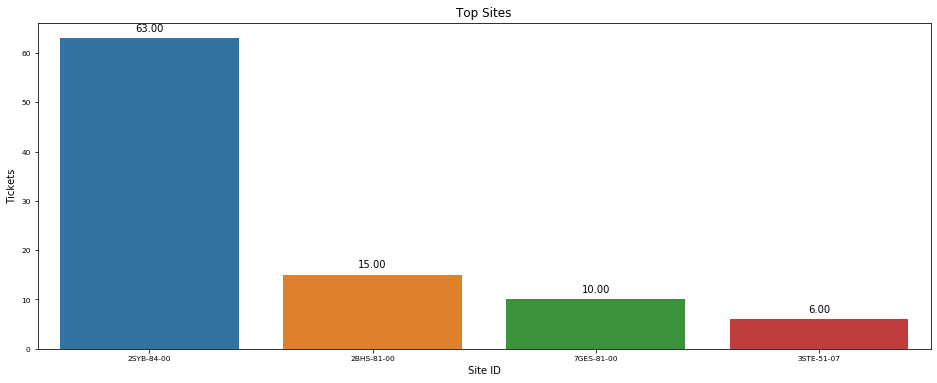

In [17]:
top_5_sites_TT_chart1()

In [21]:
priority_wise_TT_summary()

Priority wise TT Distribution
	1. Minor [58.0%]
	2. Medium [26.0%]
	3. Non-service affecting [14.0%]
	4. Major [2.0%]
	5. Critical [0.0%]
	6. None [0.0%]
